<a href="https://colab.research.google.com/github/fatsed/CustomerSupportToneChecker/blob/main/ToneDetection_api_ui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Build dataset




In [30]:
!git clone https://github.com/fatsed/CustomerSupportToneChecker.git

Cloning into 'CustomerSupportToneChecker'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 74 (delta 28), reused 37 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 61.87 KiB | 4.42 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [31]:
%cd /content/CustomerSupportToneChecker/notebooks

/content/CustomerSupportToneChecker/notebooks


In [32]:
import os
os.makedirs("../dataset", exist_ok=True)

In [33]:
import pandas as pd

data = [
    # Polite
    {"text": "سلام وقت بخیر. می‌خواستم وضعیت سفارش شماره ۱۲۳۴ رو بدونم.", "label": "polite"},
    {"text": "سلام و عرض ادب. لطفاً زمان تقریبی ارسال بسته منو اعلام کنید.", "label": "polite"},
    {"text": "با سلام. ممنون می‌شم اگر کد رهگیری را برای بنده ارسال کنید.", "label": "polite"},
    {"text": "روزتون بخیر. امکانش هست وضعیت مرسوله را بررسی کنید؟", "label": "polite"},
    {"text": "سلام. ممنون می‌شم اگر راهنمایی کنید چطور می‌تونم آدرس رو اصلاح کنم.", "label": "polite"},
    {"text": "وقتتون بخیر. اگر زحمتی نیست هزینه ارسال به شیراز رو می‌فرمایید؟", "label": "polite"},
    {"text": "سلام. مرسی از پشتیبانی خوبتون. فقط یک سوال درباره موجودی داشتم.", "label": "polite"},
    {"text": "سلام. لطفاً مشخصات فنی محصول رو برام ارسال می‌کنید؟", "label": "polite"},
    {"text": "درود بر شما. امکانش هست فاکتور خرید رو برام ایمیل کنید؟", "label": "polite"},
    {"text": "سلام و خسته نباشید. وضعیت سفارش من به‌روزرسانی نشده، ممکنه بررسی کنید؟", "label": "polite"},
    {"text": "سلام. اگر برای شما مقدوره، زمان دقیق ارسال رو اعلام کنید.", "label": "polite"},
    {"text": "روز بخیر. می‌خواستم مطمئن بشم سفارشم ثبت شده یا نه.", "label": "polite"},
    {"text": "سلام. ممنون می‌شم اگر لینک پرداخت رو دوباره ارسال کنید.", "label": "polite"},
    {"text": "سلام. آیا امکان تغییر سایز کالا وجود دارد؟", "label": "polite"},
    {"text": "وقت شما بخیر. اگر فرصت داشتید موجودی این کالا را بررسی کنید.", "label": "polite"},
    {"text": "سلام. من پیامم رو ارسال کردم، ممنون می‌شم اگر پیگیری کنید.", "label": "polite"},
    {"text": "سلام. اگر امکان داره، تخفیف‌های امروز رو اطلاع بدین.", "label": "polite"},
    {"text": "درود. لطفاً اگر ارسال انجام شد، اطلاع‌رسانی بفرمایید.", "label": "polite"},
    {"text": "سلام. من تازه ثبت‌نام کردم، ممنون می‌شم راهنمایی کنید.", "label": "polite"},
    {"text": "سلام. خیلی ممنون می‌شم اگر سفارشم رو سریع‌تر بررسی کنید.", "label": "polite"},
    {"text": "با سلام و احترام. آیا امکان تمدید گارانتی وجود دارد؟", "label": "polite"},
    {"text": "سلام. لطفاً رسید پرداخت را برای من ارسال کنید. سپاس.", "label": "polite"},
    {"text": "سلام. اگر ممکنه موجودی رنگ مشکی رو بررسی کنید.", "label": "polite"},
    {"text": "خسته نباشید. آیا ارسال با پست پیشتاز انجام می‌شود؟", "label": "polite"},
    {"text": "سلام وقت بخیر. برای انتخاب سایز مناسب راهنمایی می‌خواستم.", "label": "polite"},
    {"text": "سلام. لطفاً شماره تماس پشتیبانی را اعلام کنید.", "label": "polite"},
    {"text": "سلام. ممنون می‌شم اگر هزینه مرجوعی را بفرمایید.", "label": "polite"},
    {"text": "درود بر شما. امکان لغو سفارش وجود دارد؟", "label": "polite"},
    {"text": "سلام. خیلی ممنون می‌شم زمان تقریبی تحویل رو اعلام کنید.", "label": "polite"},
    {"text": "سلام. می‌خواستم بدونم امکان ارسال فوری هست؟", "label": "polite"},
    {"text": "سلام. ممنون از خدمات خوبتون. فقط یک سوال داشتم.", "label": "polite"},
    {"text": "وقت شما بخیر. امکان اصلاح شماره تماس وجود داره؟", "label": "polite"},
    {"text": "سلام. لطفاً اگر سفارشم ارسال شد اطلاع بدین.", "label": "polite"},
    {"text": "سلام. آیا این محصول شامل گارانتی هست؟", "label": "polite"},
    {"text": "بسیار ممنون می‌شم اگر راهنمایی کنید چطور ثبت‌نام کنم.", "label": "polite"},
    {"text": "سلام خدمت شما. امکان ارسال تصاویر واقعی محصول هست؟", "label": "polite"},
    {"text": "سلام. من سفارشم رو ثبت کردم، ممنون می‌شم تایید کنید.", "label": "polite"},
    {"text": "سلام. آیا امکان پرداخت در محل وجود دارد؟", "label": "polite"},
    {"text": "درود. لطفاً راهنمای خرید برای من ارسال کنید.", "label": "polite"},
    {"text": "سلام. ممنون اگر درباره تفاوت دو مدل توضیح بدین.", "label": "polite"},
    {"text": "سلام. هزینه ارسال برای چند محصول تغییر می‌کند؟", "label": "polite"},
    {"text": "روزتون بخیر. لطفاً زمان پاسخگویی تلفنی رو بفرمایید.", "label": "polite"},
    {"text": "سلام. امکانش هست لینک آموزش استفاده رو بفرستید؟", "label": "polite"},
    {"text": "سلام. آیا این محصول امکان تست دارد؟", "label": "polite"},
    {"text": "وقت بخیر. اگر زحمتی نیست اطلاعات فنی بیشتری می‌خواستم.", "label": "polite"},
    {"text": "سلام. ممنون می‌شم وضعیت انبار رو بررسی کنید.", "label": "polite"},
    {"text": "سلام و تشکر. فقط یک سوال کوچک درباره ارسال دارم.", "label": "polite"},
    {"text": "سلام. ممنون می‌شم اگر تخفیف‌های فعال رو معرفی کنید.", "label": "polite"},
    {"text": "سلام. آیا محصول دوباره موجود می‌شود؟", "label": "polite"},
    {"text": "سلام. از خدمات شما راضی هستم. یک سوال درباره مرجوعی داشتم.", "label": "polite"},
    {"text": "سلام وقت بخیر. می‌خواستم درباره روش ارسال بدونم.", "label": "polite"},
    {"text": "سلام. یه راهنمایی درباره شیوه پرداخت می‌خواستم.", "label": "polite"},
    {"text": "سلام دوستان. ممنون اگر پیگیری فرمایید سفارشم کجاست.", "label": "polite"},
    {"text": "سلام. این محصول برای استفاده روزمره مناسبه؟", "label": "polite"},
    {"text": "درود. لطفاً اگر موجود شد اطلاع بدید.", "label": "polite"},
    {"text": "سلام. می‌خواستم رنگ‌های موجود رو بدونم.", "label": "polite"},
    {"text": "سلام. امکان یادآوری زمان ارسال هست؟", "label": "polite"},
    {"text": "سلام. خیلی ممنون بابت پیگیری.", "label": "polite"},
    {"text": "وقتتون بخیر. ممنون می‌شم اگر راهنمای خرید بدید.", "label": "polite"},
    {"text": "سلام. یک سوال درباره فعال‌سازی گارانتی دارم.", "label": "polite"},
    {"text": "سلام. لطفاً لینک دانلود اپلیکیشن رو ارسال کنید.", "label": "polite"},
    {"text": "درود بر شما. ممنون از زحماتتون.", "label": "polite"},
    {"text": "سلام. فقط خواستم تشکر کنم بابت پشتیبانی خوبتون.", "label": "polite"},
    {"text": "سلام وقت بخیر. می‌خواستم یک سوال کوچک بپرسم.", "label": "polite"},
    {"text": "سلام. آیا امکان ارسال امروز هست؟", "label": "polite"},
    {"text": "سلام. می‌خواستم درباره شرایط بازگشت کالا بدونم.", "label": "polite"},
    {"text": "سلام. برای خرید عمده تخفیف دارید؟", "label": "polite"},
    {"text": "وقت بخیر. آیا امکان تست قبل از خرید وجود داره؟", "label": "polite"},
    {"text": "سلام. اگر ممکنه سایز‌بندی رو توضیح بدین.", "label": "polite"},
    {"text": "سلام. لطفاً اگر این محصول مشابه دارد اطلاع دهید.", "label": "polite"},
    {"text": "سلام. امکان داره سفارش رو سریع‌تر ارسال کنید؟ ممنون.", "label": "polite"},
    {"text": "سلام. من سفارشم ثبت شده ولی تایید نشده. ممکنه بررسی کنید؟", "label": "polite"},
    {"text": "سلام. آیا امکان ارسال به خارج از کشور وجود دارد؟", "label": "polite"},
    {"text": "سلام. ممنون از پاسخگویی شما.", "label": "polite"},
    {"text": "سلام. امکانش هست نمونه محصول بفرستید؟", "label": "polite"},
    {"text": "وقت شما بخیر. یک سوال درباره نحوه بسته‌بندی داشتم.", "label": "polite"},
    {"text": "سلام. کد تخفیف جدید دارید؟", "label": "polite"},
    {"text": "سلام. آیا این کالا اصل هست؟", "label": "polite"},
    {"text": "درود. لطفاً راهنمای نصب بفرستید.", "label": "polite"},
    {"text": "سلام. یک سوال درباره موجودی داشتم.", "label": "polite"},
    {"text": "سلام. لطفاً بسته من را دوباره بررسی کنید.", "label": "polite"},
    {"text": "سلام. چقدر زمان می‌بره تا ارسال بشه؟", "label": "polite"},
    {"text": "درود بر شما. آیا امکان ارسال فوری هست؟", "label": "polite"},
    {"text": "سلام. می‌خواستم کاتالوگ محصول رو ببینم.", "label": "polite"},
    {"text": "وقت بخیر. سفارش من کی آماده می‌شه؟", "label": "polite"},
    {"text": "سلام. نحوه استفاده از محصول چطور است؟", "label": "polite"},
    {"text": "سلام. لطفاً رسید سفارش رو ارسال کنید.", "label": "polite"},
    {"text": "سلام. محصولی مشابه این دارید؟", "label": "polite"},
    {"text": "سلام. خیلی ممنون بابت راهنمایی شما.", "label": "polite"},
    {"text": "سلام. ارسال در چه روزهایی انجام می‌شه؟", "label": "polite"},
    {"text": "سلام. فقط خواستم یک تشکر ساده بکنم.", "label": "polite"},
    {"text": "سلام. امکانش هست محصول رو رزرو کنم؟", "label": "polite"},
    {"text": "سلام. می‌خواستم زمان شروع ارسال‌ها رو بدونم.", "label": "polite"},
    {"text": "سلام. آیا امکان تمدید مهلت پرداخت هست؟", "label": "polite"},
    {"text": "وقت بخیر. موجودی انبار رو چک می‌کنید؟", "label": "polite"},
    {"text": "سلام. اگر ممکنه قبل ارسال اطلاع بدین.", "label": "polite"},
    {"text": "سلام. آیا امکان بسته‌بندی هدیه وجود دارد؟", "label": "polite"},
    {"text": "درود. لطفاً صورتحساب رو ارسال کنید.", "label": "polite"},
    {"text": "سلام. من اولین‌بارمه خرید می‌کنم، لطفاً راهنمایی کنید.", "label": "polite"},
    {"text": "سلام. ممنون از پاسخگوییتون، فقط یک سوال کوچک دارم.", "label": "polite"},
    #Semi polite
    {"text": "چرا هنوز سفارشم ارسال نشده؟ لطفاً رسیدگی کنید.", "label": "semi_polite"},
    {"text": "من چند روزه منتظر هستم ولی تغییری نمی‌بینم.", "label": "semi_polite"},
    {"text": "سفارشم دیر رسیده، می‌خوام بدونم مشکل چیه.", "label": "semi_polite"},
    {"text": "چند بار پیام دادم هنوز پاسخی نگرفتم.", "label": "semi_polite"},
    {"text": "این تأخیر برای من دردسر درست کرده، لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "گفته بودید امروز ارسال می‌شه، ولی نشده هنوز.", "label": "semi_polite"},
    {"text": "فرایند ارسال خیلی طولانی شده، لطفاً توضیح بدید.", "label": "semi_polite"},
    {"text": "واقعاً انتظار داشتم سریع‌تر پیگیری کنید.", "label": "semi_polite"},
    {"text": "چرا وضعیت سفارش من ثابت مونده؟ نگران شدم.", "label": "semi_polite"},
    {"text": "محصولی که فرستادید با عکس فرق داره، باید چیکار کنم؟", "label": "semi_polite"},
    {"text": "این بار سومه که پیام می‌دم، ممنون می‌شم پیگیری کنید.", "label": "semi_polite"},
    {"text": "توضیحات محصول کامل نبود، لطفاً دقیق‌تر توضیح بدید.", "label": "semi_polite"},
    {"text": "سفارشم اشتباه ارسال شده، لطفاً اصلاح کنید.", "label": "semi_polite"},
    {"text": "این تاخیر برای کار من مشکل ایجاد کرده، لطفاً کمک کنید.", "label": "semi_polite"},
    {"text": "نمی‌دونم چرا اینقدر طول کشیده، لطفاً وضعیت رو چک کنید.", "label": "semi_polite"},
    {"text": "من روی زمان ارسال حساب کرده بودم، لطفاً پیگیری کنید.", "label": "semi_polite"},
    {"text": "سفارش من باید دیروز می‌رسید ولی نرسیده.", "label": "semi_polite"},
    {"text": "راستش انتظار داشتم اطلاعات دقیق‌تری بدید.", "label": "semi_polite"},
    {"text": "چرا ارسال به این اندازه طولانی شده؟", "label": "semi_polite"},
    {"text": "می‌شه لطفاً دقیق‌تر توضیح بدید مشکل ارسال چیه؟", "label": "semi_polite"},
    {"text": "من منتظر تماس پشتیبانی هستم ولی کسی تماس نگرفته.", "label": "semi_polite"},
    {"text": "پیش‌فاکتور اشتباهه، لطفاً اصلاحش کنید.", "label": "semi_polite"},
    {"text": "این موضوع داره طولانی می‌شه، لطفاً یک راه‌حل بدید.", "label": "semi_polite"},
    {"text": "گفته بودید موجوده ولی الان می‌گید موجود نیست.", "label": "semi_polite"},
    {"text": "منتظر پاسخم، لطفاً زودتر اطلاع بدید.", "label": "semi_polite"},
    {"text": "من به اطلاعات بیشتری نیاز دارم، لطفاً دقیق‌تر توضیح بدید.", "label": "semi_polite"},
    {"text": "عجیبه که اینقدر طول کشیده، لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "جوابی که دادید کامل نبود، لطفاً بیشتر راهنمایی کنید.", "label": "semi_polite"},
    {"text": "محصول آسیب دیده رسیده، لطفاً بفرمایید چطور مرجوع کنم.", "label": "semi_polite"},
    {"text": "چرا شماره پشتیبانی جواب نمی‌ده؟", "label": "semi_polite"},
    {"text": "این مشکلی که پیش اومده باید سریع‌تر حل بشه لطفاً.", "label": "semi_polite"},
    {"text": "به‌نظرم باید روند پاسخ‌دهی سریع‌تر باشه.", "label": "semi_polite"},
    {"text": "این موضوع یکم طولانی شده، فکر نمی‌کردم اینطوری بشه.", "label": "semi_polite"},
    {"text": "لطفاً دقیق‌تر بگید چقدر باید صبر کنم.", "label": "semi_polite"},
    {"text": "این دفعه پاسخگویی خیلی کند بود، لطفاً رسیدگی کنید.", "label": "semi_polite"},
    {"text": "من عجله داشتم ولی ارسال هنوز انجام نشده.", "label": "semi_polite"},
    {"text": "محصولی که فرستادید با سفارش من هماهنگ نیست.", "label": "semi_polite"},
    {"text": "راستش کمی ناراحتم چون انتظار داشتم سریع‌تر رسیدگی کنید.", "label": "semi_polite"},
    {"text": "اگر این مشکل برطرف نشه برای من دردسر می‌شه.", "label": "semi_polite"},
    {"text": "لطفاً یک توضیح روشن درباره وضعیت سفارش بدید.", "label": "semi_polite"},
    {"text": "این بار دومه که اشتباه ارسال می‌کنید.", "label": "semi_polite"},
    {"text": "لطفاً مسیر ارسال رو دوباره بررسی کنید، ظاهراً اشتباهه.", "label": "semi_polite"},
    {"text": "یکم طول کشیده، ممنون می‌شم اگر سریع‌تر کنید.", "label": "semi_polite"},
    {"text": "توضیحات کامل نبود، لطفاً بیشتر توضیح بدین.", "label": "semi_polite"},
    {"text": "جوابی که دادید کافی نبود، لطفاً بیشتر راهنمایی کنید.", "label": "semi_polite"},
    {"text": "بی‌زحمت چک کنید چرا بسته من هنوز ارسال نشده.", "label": "semi_polite"},
    {"text": "اگر ممکنه گزارش دقیق‌تری بدید، ممنون.", "label": "semi_polite"},
    {"text": "محصول اشتباه ارسال شده، لطفاً راهنمایی کنید.", "label": "semi_polite"},
    {"text": "این تأخیر واقعا کلافه‌کننده شده، لطفاً توضیح بدید.", "label": "semi_polite"},
    {"text": "پاسخ شما کمی گنگ بود، لطفاً روشن‌تر توضیح بدید.", "label": "semi_polite"},
    {"text": "این بار پاسخ‌دهی کند شده. لطفاً رسیدگی کنید.", "label": "semi_polite"},
    {"text": "راستش فکر می‌کردم این موضوع ساده‌تر حل بشه.", "label": "semi_polite"},
    {"text": "اگر لطف کنید دقیق‌تر توضیح بدید متشکر می‌شم.", "label": "semi_polite"},
    {"text": "مشخص نیست بسته من الان کجاست. لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "به نظر میاد خطایی در سیستم هست. لطفاً کنترل کنید.", "label": "semi_polite"},
    {"text": "نمی‌دونم چرا سفارش من لغو شده. لطفاً توضیح بدین.", "label": "semi_polite"},
    {"text": "بسته من باید زودتر می‌رسید، لطفاً بررسی فوری کنید.", "label": "semi_polite"},
    {"text": "چند ساعته منتظرم، هنوز پاسخی دریافت نکردم.", "label": "semi_polite"},
    {"text": "راستش این مشکل برام عجیب شده. لطفاً توضیح بدید.", "label": "semi_polite"},
    {"text": "محصولی که رسید کامل نیست. لطفاً رسیدگی کنید.", "label": "semi_polite"},
    {"text": "یکم دیر پاسخ دادید. لطفاً سریع‌تر باشید.", "label": "semi_polite"},
    {"text": "کیفیت بسته‌بندی مناسب نبود. لطفاً دقت بیشتری کنید.", "label": "semi_polite"},
    {"text": "این مشکل رو باید زودتر اطلاع می‌دادید لطفاً.", "label": "semi_polite"},
    {"text": "اگر وضعیت سفارش مشخص نیست لطفاً بفرمایید.", "label": "semi_polite"},
    {"text": "امیدوارم هرچه زودتر پاسخ بدید چون عجله دارم.", "label": "semi_polite"},
    {"text": "بهتر بود زودتر اطلاع‌رسانی می‌کردید.", "label": "semi_polite"},
    {"text": "به نظر می‌رسه تأخیری در روند وجود داره. لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "محصول به درستی مونتاژ نشده. لطفاً راهنمایی کنید.", "label": "semi_polite"},
    {"text": "لطفاً دقیق‌تر توضیح بدید که مشکل از کجاست.", "label": "semi_polite"},
    {"text": "می‌شه لطفاً بگید بسته الان کجاست؟", "label": "semi_polite"},
    {"text": "این موضوع داره طولانی می‌شه. لطفاً بررسی فوری کنید.", "label": "semi_polite"},
    {"text": "بسته من اشتباهی به شهر دیگه رفته. لطفاً اصلاح کنید.", "label": "semi_polite"},
    {"text": "من هنوز پیام تأیید دریافت نکردم. لطفاً ارسال کنید.", "label": "semi_polite"},
    {"text": "لطفاً سریع‌تر توضیح بدید مشکل دقیقاً چیه.", "label": "semi_polite"},
    {"text": "این موضوع باید ساده حل می‌شد، لطفاً پیگیری کنید.", "label": "semi_polite"},
    {"text": "بسته من هنوز اسکن نشده. لطفاً چک کنید.", "label": "semi_polite"},
    {"text": "اگر امکان داره یک توضیح کامل‌تر بدید.", "label": "semi_polite"},
    {"text": "تفاوت قیمت روی سایت و فاکتور وجود داره. لطفاً اصلاح کنید.", "label": "semi_polite"},
    {"text": "راستش انتظار پاسخ سریع‌تر رو داشتم.", "label": "semi_polite"},
    {"text": "اگر ممکنه زمان دقیق ارسال رو اعلام کنید.", "label": "semi_polite"},
    {"text": "برام مهمه بدونم بسته کی می‌رسه. لطفاً چک کنید.", "label": "semi_polite"},
    {"text": "این مشکل چند روزه ادامه داره. لطفاً رسیدگی کنید.", "label": "semi_polite"},
    {"text": "من چند بار پیام گذاشتم ولی پاسخی نگرفتم.", "label": "semi_polite"},
    {"text": "اگر پیام منو دیدید لطفاً پاسخ بدید.", "label": "semi_polite"},
    {"text": "سفارشم ناقص رسیده. لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "لطفاً بگید چرا ارسال انجام نشده.", "label": "semi_polite"},
    {"text": "پاسختون دیر رسید، لطفاً در آینده سریع‌تر باشید.", "label": "semi_polite"},
    {"text": "این مشکل اگر ادامه پیدا کنه اذیت‌کننده می‌شه.", "label": "semi_polite"},
    {"text": "اگر وقت دارید این موضوع رو پیگیری کنید.", "label": "semi_polite"},
    {"text": "بسته من هنوز حرکت نکرده. لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "ممنون می‌شم اگر آدرس صحیح رو تأیید کنید.", "label": "semi_polite"},
    {"text": "لطفاً پاسخ بدید چون این موضوع برام مهمه.", "label": "semi_polite"},
    {"text": "می‌تونید بگید چرا محصول تأخیر خورده؟", "label": "semi_polite"},
    {"text": "به نظر میاد بسته من گم شده. لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "جواب قبلی شما کافی نبود، لطفاً بهتر توضیح بدید.", "label": "semi_polite"},
    {"text": "اگر ممکنه راهنمایی کنید چطور لغو کنم.", "label": "semi_polite"},
    {"text": "یکم بیشتر توضیح بدید لطفاً. ممنون.", "label": "semi_polite"},
    {"text": "این روند ارسال طولانی شده. لطفاً بررسی کنید.", "label": "semi_polite"},
    {"text": "محصولی که رسید بسته‌بندی ضعیفی داشت.", "label": "semi_polite"},
    {"text": "اگر امکانش هست یک آپدیت بدید درباره وضعیت بسته.", "label": "semi_polite"},
    #impolite
    {"text": "این چه وضعشه؟ بسته من چرا اینقدر دیر رسید؟", "label": "impolite"},
    {"text": "چرا هیچکس جواب درست نمی‌ده؟ واقعاً عجیبه!", "label": "impolite"},
    {"text": "محصول خراب به دستم رسیده. این چه کیفیتیه؟", "label": "impolite"},
    {"text": "چرا باید برای یک کار ساده اینقدر منتظر بمونم؟", "label": "impolite"},
    {"text": "پشتیبانی‌تون اصلاً درست کار نمی‌کنه!", "label": "impolite"},
    {"text": "چرا سفارش منو گم کردید؟ واقعاً غیرقابل قبوله.", "label": "impolite"},
    {"text": "این همه تأخیر برای چیه؟ توضیح بدید لطفاً!", "label": "impolite"},
    {"text": "جواب‌هاتون نصفه‌نیمه‌ست. لطفاً درست توضیح بدید.", "label": "impolite"},
    {"text": "چرا همیشه مشکل دارید؟ واقعاً خسته‌کننده‌ست.", "label": "impolite"},
    {"text": "محصول اصلاً اون چیزی که گفتید نبود.", "label": "impolite"},
    {"text": "چرا شماره پشتیبانی همیشه اشغاله؟ مگه چند نفر تماس می‌گیرن؟", "label": "impolite"},
    {"text": "این همه انتظار برای چی؟ واقعاً غیرعادیه.", "label": "impolite"},
    {"text": "بسته من کاملاً له شده رسیده. این چه وضع بسته‌بندیه؟", "label": "impolite"},
    {"text": "محصول اشتباه فرستادید! چطور همچین اشتباهی می‌کنید؟", "label": "impolite"},
    {"text": "چرا کسی پاسخگو نیست؟ این چه نوع پشتیبانیه؟", "label": "impolite"},
    {"text": "همیشه باید دنبالتون بیام تا یه کار انجام بدید؟", "label": "impolite"},
    {"text": "محصول داخل جعبه ناقصه! واقعاً مسخره‌ست.", "label": "impolite"},
    {"text": "این همه تأخیر فقط بی‌نظمی شما رو نشون می‌ده.", "label": "impolite"},
    {"text": "چرا باید سه روز صبر کنم تا جواب بدید؟", "label": "impolite"},
    {"text": "اگر نمی‌تونید سفارش‌ها رو مدیریت کنید چرا فروش دارید؟", "label": "impolite"},
    {"text": "این رفتار اصلاً حرفه‌ای نیست.", "label": "impolite"},
    {"text": "محصولی که فرستادید تقلبیه. این واقعاً قابل قبوله؟", "label": "impolite"},
    {"text": "چرا اطلاعات اشتباه روی سایت گذاشتید؟", "label": "impolite"},
    {"text": "بسته به آدرس اشتباه ارسال شده! واقعاً جدی؟", "label": "impolite"},
    {"text": "این وضعیت افتضاحه. لطفاً اصلاحش کنید.", "label": "impolite"},
    {"text": "چطور ممکنه سفارشم بدون هماهنگی لغو شده باشه؟", "label": "impolite"},
    {"text": "این چه نوع خدماتیه واقعاً؟", "label": "impolite"},
    {"text": "نمی‌دونم واقعاً با چه روشی کار می‌کنید.", "label": "impolite"},
    {"text": "چرا بسته من چند روزه تو یک مکان ثابت مونده؟", "label": "impolite"},
    {"text": "این همه تأخیر یعنی چی؟ توضیح بدید.", "label": "impolite"},
    {"text": "کیفیت محصول خیلی پایین‌تر از چیزی بود که گفته بودید.", "label": "impolite"},
    {"text": "به نظرم اصلاً به پیام‌های مشتری دقت نمی‌کنید.", "label": "impolite"},
    {"text": "چرا اینقدر نامنظم هستید؟", "label": "impolite"},
    {"text": "با این روند، آدم از خرید پشیمون می‌شه!", "label": "impolite"},
    {"text": "بسته من نرسیده، چرا می‌گید تحویل شده؟", "label": "impolite"},
    {"text": "این وضعیت واقعاً آزاردهنده‌ست.", "label": "impolite"},
    {"text": "چرا اطلاعات اشتباه ثبت کردید؟", "label": "impolite"},
    {"text": "محصول کاملاً فرق داشت. انگار اشتباهی چیزی فرستادید.", "label": "impolite"},
    {"text": "این همه بی‌دقتی واقعاً عجیبه.", "label": "impolite"},
    {"text": "محصول شکستۀ به دستم رسید. این چه وضعشه؟", "label": "impolite"},
    {"text": "چطور اینقدر ساده اشتباه می‌کنید؟", "label": "impolite"},
    {"text": "دفعه آخرمه از شما خرید می‌کنم.", "label": "impolite"},
    {"text": "پاسخ‌هاتون هیچ کمکی نمی‌کنه.", "label": "impolite"},
    {"text": "چرا فاکتور اشتباه صادر کردید؟", "label": "impolite"},
    {"text": "نمی‌دونم واقعاً دارید چه کار می‌کنید.", "label": "impolite"},
    {"text": "سفارشم به آدرس همسایه رفته! این چه کاریه؟", "label": "impolite"},
    {"text": "چرا بسته‌بندی اینقدر بی‌کیفیت بود؟", "label": "impolite"},
    {"text": "محصول کار نمی‌کنه! یعنی تستش نکردید؟", "label": "impolite"},
    {"text": "واقعا باید این همه دردسر بکشم؟", "label": "impolite"},
    {"text": "جواب‌ها خیلی دیر می‌رسه. این طوری نمی‌شه!", "label": "impolite"},
    {"text": "به نظرم این شرکت اصلاً درست مدیریت نمی‌شه.", "label": "impolite"},
    {"text": "این سطح پاسخگویی اصلاً قابل قبول نیست.", "label": "impolite"},
    {"text": "محصول اشتباهی ارسال کردید. چطور؟", "label": "impolite"},
    {"text": "این کارتون اصلاً حرفه‌ای نیست.", "label": "impolite"},
    {"text": "چرا بسته انقدر دیر تحویل داده شد؟", "label": "impolite"},
    {"text": "سفارشم گم شده؟ چون هیچ آپدیتی نمی‌ده!", "label": "impolite"},
    {"text": "محصول رو اشتباه تحویل گرفتید. رسیدگی کنید!", "label": "impolite"},
    {"text": "این همه اشتباه یعنی چی؟", "label": "impolite"},
    {"text": "تا کی باید صبر کنم؟ این درست نیست.", "label": "impolite"},
    {"text": "جواب‌هاتون ضد و نقیضه.", "label": "impolite"},
    {"text": "بسته من برگشت خورده بدون دلیل!", "label": "impolite"},
    {"text": "این رویکردتون اصلاً منطقی نیست.", "label": "impolite"},
    {"text": "چرا سفارش من رو اشتباه ثبت کردید؟", "label": "impolite"},
    {"text": "محصول نیمه‌کاره به دستم رسیده!", "label": "impolite"},
    {"text": "کیفیت محصول اصلاً شبیه عکس نیست.", "label": "impolite"},
    {"text": "این چه سرویسیه واقعاً؟", "label": "impolite"},
    {"text": "دوباره اشتباه کردید. واقعاً عجیبه.", "label": "impolite"},
    {"text": "چرا اینقدر کم‌توجه هستید؟", "label": "impolite"},
    {"text": "محصول بدون لوازم جانبی ارسال شده!", "label": "impolite"},
    {"text": "این جور ارسال کردن غیر قابل قبوله.", "label": "impolite"},
    {"text": "پاسخ‌هاتون خیلی سطحیه. لطفاً دقیق باشید.", "label": "impolite"},
    {"text": "سفارشم به‌طور عجیب لغو شده. چرا؟", "label": "impolite"},
    {"text": "اگر نمی‌تونید انجام بدید چرا قول می‌دید؟", "label": "impolite"},
    {"text": "بسته به درستی بسته‌بندی نشده بود.", "label": "impolite"},
    {"text": "این حجم خطا پذیرفتنی نیست.", "label": "impolite"},
    {"text": "ارسال اشتباهی باعث شده کارم عقب بیفته.", "label": "impolite"},
    {"text": "چرا باید خودم دائم پیگیری کنم؟", "label": "impolite"},
    {"text": "این روند ارسال واقعاً کند و آزاردهنده‌ست.", "label": "impolite"},
    {"text": "محصول فیک فرستادید؟ این چه وضعیه؟", "label": "impolite"},
    {"text": "چرا اصلاً پیام‌ها رو نمی‌خونید؟", "label": "impolite"},
    {"text": "این پاسخ‌ها هیچ کمکی به من نمی‌کنه.", "label": "impolite"},
    {"text": "محصول داخل جعبه خیس بود، واقعاً چرا؟", "label": "impolite"},
    {"text": "این اشتباهات پشت سر هم اعصاب خردکنه.", "label": "impolite"},
    {"text": "اصلاً انتظاری ازتون ندارم با این عملکرد.", "label": "impolite"},
    {"text": "این برخورد حرفه‌ای نیست.", "label": "impolite"},
    {"text": "تا کی باید صبر کنم برای یک جواب ساده؟", "label": "impolite"},
    {"text": "محصول باز شده و استفاده شده به دستم رسید!", "label": "impolite"},
    {"text": "این بسته‌تون اصلاً سالم نیست.", "label": "impolite"},
    {"text": "چرا بسته من برگشت خورده؟ هیچ توضیحی ندادید.", "label": "impolite"},
    {"text": "وضوح اطلاعاتتون خیلی ضعیفه.", "label": "impolite"},
    {"text": "پاسخ‌هاتون خیلی غیرمسئولانه‌ست.", "label": "impolite"},
    {"text": "کی قرار بود پیگیری کنید؟ هیچ کاری نکردید.", "label": "impolite"},
    {"text": "بسته من کجاست؟ این غیرقابل قبوله.", "label": "impolite"},
    {"text": "این روند واقعاً ناامیدکننده‌ست.", "label": "impolite"},
    {"text": "چرا اطلاعات نادرست به من دادید؟", "label": "impolite"},
    {"text": "این نحوه رفتار با مشتری اصلاً درست نیست.", "label": "impolite"},
    {"text": "محصولی که فرستادید کار نمی‌کنه. توضیح بدید.", "label": "impolite"},
    {"text": "این حجم بی‌نظمی رو تا حالا ندیده بودم.", "label": "impolite"},
    {"text": "متأسفم ولی کارتون اصلاً قابل قبول نیست.", "label": "impolite"},
    {"text": "بسته هنوز ارسال نشده. این رفتار اصلاً درست نیست.", "label": "impolite"},
]
df = pd.DataFrame(data)

df["text"] = df["text"].astype(str).str.strip()
df = df.dropna(subset=["text", "label"])
df = df.drop_duplicates(subset=["text", "label"]).reset_index(drop=True)

df.insert(0, "id", range(1, len(df) + 1))
csv_path = "../dataset/tone_dataset.csv"
df.to_csv(csv_path, index=False, encoding="utf-8-sig")
print("CSV saved successfully at:", csv_path)

CSV saved successfully at: ../dataset/tone_dataset.csv


#2-Preprocessing

In [34]:
#load dataset
csv_path = "../dataset/tone_dataset.csv"
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print(df.head())
print(df["label"].value_counts())

Shape: (300, 3)
   id                                               text   label
0   1  سلام وقت بخیر. می‌خواستم وضعیت سفارش شماره ۱۲۳...  polite
1   2  سلام و عرض ادب. لطفاً زمان تقریبی ارسال بسته م...  polite
2   3  با سلام. ممنون می‌شم اگر کد رهگیری را برای بند...  polite
3   4  روزتون بخیر. امکانش هست وضعیت مرسوله را بررسی ...  polite
4   5  سلام. ممنون می‌شم اگر راهنمایی کنید چطور می‌تو...  polite
label
polite         100
semi_polite    100
impolite       100
Name: count, dtype: int64


In [35]:
# Encode labels to numeric (label_id)
label_map = {
    "polite": 0,
    "semi_polite": 1,
    "impolite": 2
}
df["label_id"] = df["label"].map(label_map)
print(df[["id", "text", "label", "label_id"]].head())
print("\nEncoded label counts:")
print(df["label_id"].value_counts())

   id                                               text   label  label_id
0   1  سلام وقت بخیر. می‌خواستم وضعیت سفارش شماره ۱۲۳...  polite         0
1   2  سلام و عرض ادب. لطفاً زمان تقریبی ارسال بسته م...  polite         0
2   3  با سلام. ممنون می‌شم اگر کد رهگیری را برای بند...  polite         0
3   4  روزتون بخیر. امکانش هست وضعیت مرسوله را بررسی ...  polite         0
4   5  سلام. ممنون می‌شم اگر راهنمایی کنید چطور می‌تو...  polite         0

Encoded label counts:
label_id
0    100
1    100
2    100
Name: count, dtype: int64


In [36]:
!pip install gensim python-crfsuite fasttext flashtext && pip install hazm --no-deps

In [43]:
from hazm import Normalizer, word_tokenize, stopwords_list
import re

normalizer = Normalizer()
stopwords = set(stopwords_list())

def clean_text(text: str) -> str:
    text = str(text)

    # 1) Normalize
    text = normalizer.normalize(text)

    # 2) Remove English letters and numbers (optional but cleaner)
    text = re.sub(r"[A-Za-z0-9۰-۹]", " ", text)

    # 3) Tokenize
    tokens = word_tokenize(text)

    # 4) Remove stopwords + very short tokens
    tokens = [t for t in tokens if t not in stopwords and len(t) > 1]

    # 5) ⚠️ NO STEMMING, NO LEMMATIZATION
    # (چون باعث خراب شدن کلمه‌ها می‌شه)

    return " ".join(tokens)


In [44]:
df["text_clean"] = df["text"].apply(clean_text)
print("نمونه قبل و بعد از پیش‌پردازش:")
df[["text", "text_clean"]].head(10)


نمونه قبل و بعد از پیش‌پردازش:


,text,text_clean
0,سلام وقت بخیر. می‌خواستم وضعیت سفارش شماره ۱۲۳...,سلام وقت بخیر می‌خواستم وضعیت سفارش شماره بدونم
1,سلام و عرض ادب. لطفاً زمان تقریبی ارسال بسته م...,سلام عرض ادب لطفا زمان تقریبی ارسال بسته منو ا...
2,با سلام. ممنون می‌شم اگر کد رهگیری را برای بند...,سلام ممنون می‌شم کد رهگیری بنده ارسال
3,روزتون بخیر. امکانش هست وضعیت مرسوله را بررسی ...,روزتون بخیر امکانش هست وضعیت مرسوله بررسی
4,سلام. ممنون می‌شم اگر راهنمایی کنید چطور می‌تو...,سلام ممنون می‌شم راهنمایی چطور می‌تونم آدرس اصلاح
5,وقتتون بخیر. اگر زحمتی نیست هزینه ارسال به شیر...,وقتتون بخیر زحمتی هزینه ارسال شیراز می‌فرمایید
6,سلام. مرسی از پشتیبانی خوبتون. فقط یک سوال درب...,سلام مرسی پشتیبانی خوبتون سوال موجودی داشتم
7,سلام. لطفاً مشخصات فنی محصول رو برام ارسال می‌...,سلام لطفا مشخصات فنی محصول برام ارسال می‌کنید
8,درود بر شما. امکانش هست فاکتور خرید رو برام ای...,درود امکانش هست فاکتور خرید برام ایمیل
9,سلام و خسته نباشید. وضعیت سفارش من به‌روزرسانی...,سلام خسته نباشید وضعیت سفارش به‌روزرسانی نشده ...


In [42]:
#Save preprocessed dataset
preprocessed_csv_path = "../dataset/tone_dataset_preprocessed.csv"
df.to_csv(preprocessed_csv_path, index=False, encoding="utf-8-sig")
print("Preprocessed CSV saved at:", preprocessed_csv_path)
print("Columns:", df.columns.tolist())

Preprocessed CSV saved at: ../dataset/tone_dataset_preprocessed.csv
Columns: ['id', 'text', 'label', 'label_id', 'text_clean']


#3-Feature Extraction

In [45]:
from sklearn.model_selection import train_test_split

X = df["text_clean"]
y = df["label_id"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20٪ برای تست
    stratify=y,          # حفظ نسبت کلاس‌ها
    random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("Label distribution in train:")
print(y_train.value_counts())

Train size: 240
Test size: 60
Label distribution in train:
label_id
0    80
1    80
2    80
Name: count, dtype: int64


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),   # uni-gram + bi-gram
    min_df=1,             # حداقل تعداد ظاهر شدن
    # می‌تونی برای کنترل ابعاد ویژگی‌ها از max_features هم استفاده کنی، مثلاً:
    # max_features=5000
)

# fit فقط روی داده‌های train
X_train_tfidf = tfidf.fit_transform(X_train)

# transform روی test با همون واژه‌نامه
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (240, 1222)
TF-IDF test shape: (60, 1222)


In [47]:
feature_names = tfidf.get_feature_names_out()
print("Total features:", len(feature_names))
print("نمونه‌ای از چند ویژگی اول:")
print(feature_names[:30])

Total features: 1222
نمونه‌ای از چند ویژگی اول:
['آخرمه' 'آخرمه خرید' 'آدرس' 'آدرس اصلاح' 'آدرس صحیح' 'آدرس همسایه' 'آدم'
 'آدم خرید' 'آزاردهنده' 'آزاردهنده ست' 'آسیب' 'آسیب دیده' 'آموزش'
 'آموزش استفاده' 'آپدیت' 'آپدیت بدید' 'آینده' 'آینده سریع' 'ادامه'
 'ادامه داره' 'ادامه کنه' 'اذیت' 'اذیت کننده' 'ارسال' 'ارسال اشتباهی'
 'ارسال اطلاع' 'ارسال اعلام' 'ارسال امروز' 'ارسال انجام' 'ارسال اندازه']


# 4-Model Training

In [ ]:
# 4- Model Training (Linear SVM) - BEHTARE TOYE ADEHAYE KOTAH

In [48]:
# ===== 4.1 Train Linear SVM =====
from sklearn.svm import LinearSVC

svm_model = LinearSVC()

svm_model.fit(X_train_tfidf, y_train)

print("✔ مدل SVM با موفقیت آموزش داده شد.")

✔ مدل SVM با موفقیت آموزش داده شد.


In [49]:
# ===== 4.2 Make predictions =====
y_pred = svm_model.predict(X_test_tfidf)

print("Predictions done.")

Predictions done.


In [50]:
# ===== 4.3 Evaluation =====
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["polite","semi_polite","impolite"]))

Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      polite       0.95      1.00      0.98        20
 semi_polite       0.94      0.85      0.89        20
    impolite       0.90      0.95      0.93        20

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



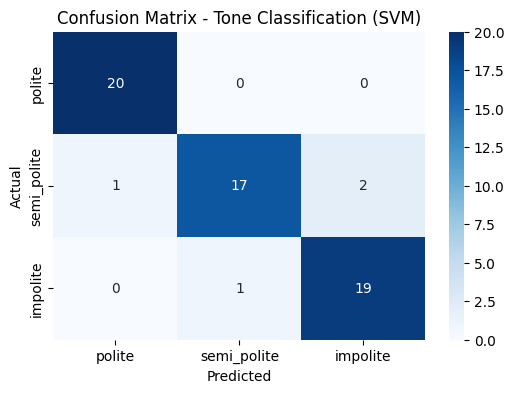

In [51]:
# ===== 4.4 Confusion Matrix =====
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["polite","semi_polite","impolite"],
            yticklabels=["polite","semi_polite","impolite"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tone Classification (SVM)")
plt.show()

In [67]:
# 4.5 - Train & Compare Multiple Models (SVM / LR / RF / DT)

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# دیکشنری مدل‌ها
models_dict = {
    "SVM (LinearSVC)": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [68]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    """
    یک مدل اسکیکیت‌لرن را می‌گیرد،
    روی train فیت می‌کند،
    روی test پیش‌بینی می‌کند،
    و accuracy / precision / recall / f1 (macro) را برمی‌گرداند.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="macro", zero_division=0
    )

    return model, acc, precision, recall, f1

In [69]:
import pandas as pd

results = []
trained_models = {}   # اینجا مدل‌های آموزش‌دیده را نگه می‌داریم برای استفاده در UI

for name, model in models_dict.items():
    print(f"🔹 Training model: {name} ...")
    fitted_model, acc, prec, rec, f1 = train_and_evaluate(
        model, X_train_tfidf, y_train, X_test_tfidf, y_test
    )

    trained_models[name] = fitted_model  # ذخیره مدل برای بعداً

    results.append({
        "model": name,
        "accuracy": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "f1_macro": f1
    })

# ساخت DataFrame نتایج
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="accuracy", ascending=False).reset_index(drop=True)

print("\n📊 مقایسه عملکرد مدل‌ها:")
results_df

🔹 Training model: SVM (LinearSVC) ...
🔹 Training model: Logistic Regression ...
🔹 Training model: Random Forest ...
🔹 Training model: Decision Tree ...

📊 مقایسه عملکرد مدل‌ها:


,model,accuracy,precision_macro,recall_macro,f1_macro
0,Logistic Regression,0.950000,0.953824,0.950000,0.948970
1,SVM (LinearSVC),0.933333,0.933862,0.933333,0.932392
2,Random Forest,0.916667,0.933333,0.916667,0.917379
3,Decision Tree,0.916667,0.923510,0.916667,0.917606


In [71]:
# 4.6 - Active model selector

# پیش‌فرض: SVM را به عنوان مدل فعال می‌گذاریم
active_model_name = "Logistic Regression"
active_model = trained_models[active_model_name]

print("مدل فعال فعلی:", active_model_name)

مدل فعال فعلی: Logistic Regression


In [72]:
def predict_tone(text: str, model_name: str = None):
    """
    اگر model_name داده شود، از آن مدل استفاده می‌کنیم.
    اگر نه، از active_model استفاده می‌شود.
    """
    if model_name is None:
        model = active_model
        name = active_model_name
    else:
        model = trained_models.get(model_name, active_model)
        name = model_name

    text_clean = clean_text(text)
    x_vec = tfidf.transform([text_clean])
    pred_id = model.predict(x_vec)[0]

    label_en = id2label[pred_id]
    label_fa = label2fa[label_en]

    return name, label_en, label_fa

In [73]:
test_text = "این چه وضعشه؟ چند روزه معطل سفارشم هستم!"
for name in trained_models.keys():
    m_name, en, fa = predict_tone(test_text, model_name=name)
    print(f"مدل: {m_name} → {en} / {fa}")

مدل: SVM (LinearSVC) → impolite / غیرمودبانه
مدل: Logistic Regression → impolite / غیرمودبانه
مدل: Random Forest → impolite / غیرمودبانه
مدل: Decision Tree → semi_polite / نیمه‌مودبانه


# 5-Evaluation

In [53]:
#Evaluation & Error Analysis

In [54]:
# ===== 5.1 Build test_df with true & predicted labels =====
# نگاشت عدد به اسم کلاس
id2label = {
    0: "polite",
    1: "semi_polite",
    2: "impolite"
}
# انتخاب سطرهای تست از df اصلی (بر اساس index)
test_df = df.loc[X_test.index].copy()
# اضافه کردن برچسب واقعی و پیش‌بینی‌شده
test_df["y_true"] = y_test.values
test_df["y_pred"] = y_pred

test_df["true_label"] = test_df["y_true"].map(id2label)
test_df["pred_label"] = test_df["y_pred"].map(id2label)

print(test_df[["id", "text", "true_label", "pred_label"]].head(10))

      id                                               text   true_label  \
2      3  با سلام. ممنون می‌شم اگر کد رهگیری را برای بند...       polite   
63    64       سلام وقت بخیر. می‌خواستم یک سوال کوچک بپرسم.       polite   
231  232      به نظرم اصلاً به پیام‌های مشتری دقت نمی‌کنید.     impolite   
291  292          کی قرار بود پیگیری کنید؟ هیچ کاری نکردید.     impolite   
243  244                      چرا فاکتور اشتباه صادر کردید؟     impolite   
84    85                 وقت بخیر. سفارش من کی آماده می‌شه؟       polite   
147  148       محصول اشتباه ارسال شده، لطفاً راهنمایی کنید.  semi_polite   
52    53  سلام دوستان. ممنون اگر پیگیری فرمایید سفارشم ک...       polite   
268  269                  محصول بدون لوازم جانبی ارسال شده!     impolite   
91    92                سلام. امکانش هست محصول رو رزرو کنم؟       polite   

      pred_label  
2         polite  
63        polite  
231     impolite  
291     impolite  
243     impolite  
84        polite  
147  semi_polite  
52        p

In [55]:
# ===== 5.2 Extract misclassified examples =====
errors = test_df[test_df["y_true"] != test_df["y_pred"]].copy()

print("تعداد کل نمونه‌های تست:", len(test_df))
print("تعداد خطاها:", len(errors))
print("نرخ خطا:", len(errors) / len(test_df))

# چند تا نمونه از خطاها
errors[["id", "text", "true_label", "pred_label"]].head(15)


تعداد کل نمونه‌های تست: 60
تعداد خطاها: 4
نرخ خطا: 0.06666666666666667


,id,text,true_label,pred_label
195,196,اگر ممکنه راهنمایی کنید چطور لغو کنم.,semi_polite,polite
140,141,این بار دومه که اشتباه ارسال می‌کنید.,semi_polite,impolite
255,256,سفارشم گم شده؟ چون هیچ آپدیتی نمی‌ده!,impolite,semi_polite
161,162,کیفیت بسته‌بندی مناسب نبود. لطفاً دقت بیشتری ک...,semi_polite,impolite


In [56]:
# ===== 5.3 Group errors by (true_label, pred_label) =====

error_groups = errors.groupby(["true_label", "pred_label"]).size().reset_index(name="count")
print(error_groups)

    true_label   pred_label  count
0     impolite  semi_polite      1
1  semi_polite     impolite      2
2  semi_polite       polite      1


In [ ]:
#بیشترین خطلا برای impolite

In [57]:
# ===== 5.4 Show some typical errors for each confusion case =====

def show_errors(true_label, pred_label, n=5):
    subset = errors[(errors["true_label"] == true_label) &
                    (errors["pred_label"] == pred_label)]
    print(f"\n=== واقعی: {true_label} | پیش‌بینی: {pred_label} | تعداد: {len(subset)} ===")
    for i, row in subset.head(n).iterrows():
        print("• متن:", row["text"])
        print("---")

# مثال‌ها (هر کدوم اگر خطا داشت)
show_errors("polite", "semi_polite", n=5)
show_errors("semi_polite", "polite", n=5)
show_errors("semi_polite", "impolite", n=5)
show_errors("impolite", "semi_polite", n=5)


=== واقعی: polite | پیش‌بینی: semi_polite | تعداد: 0 ===

=== واقعی: semi_polite | پیش‌بینی: polite | تعداد: 1 ===
• متن: اگر ممکنه راهنمایی کنید چطور لغو کنم.
---

=== واقعی: semi_polite | پیش‌بینی: impolite | تعداد: 2 ===
• متن: این بار دومه که اشتباه ارسال می‌کنید.
---
• متن: کیفیت بسته‌بندی مناسب نبود. لطفاً دقت بیشتری کنید.
---

=== واقعی: impolite | پیش‌بینی: semi_polite | تعداد: 1 ===
• متن: سفارشم گم شده؟ چون هیچ آپدیتی نمی‌ده!
---


!!!پیشنهاد "این جمله از نظر انسانی نیمه‌مودب است، اما مدل آن را مودب تشخیص داده؛ چون واژگان مودبانه («لطفاً»، «ممنون») در متن وجود دارد."

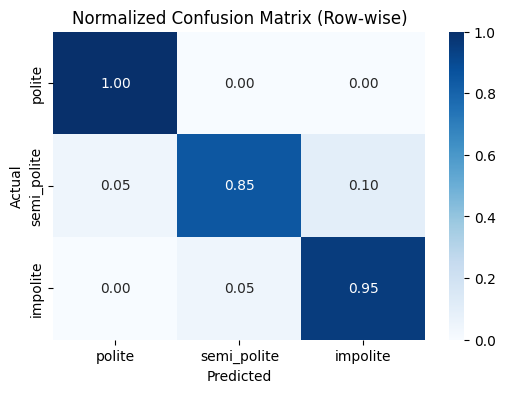

In [58]:
# ===== 5.5 Normalized confusion matrix (row-wise) =====

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(6,4))
sns.heatmap(cm_norm, annot=True, cmap="Blues", fmt=".2f",
            xticklabels=["polite","semi_polite","impolite"],
            yticklabels=["polite","semi_polite","impolite"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix (Row-wise)")
plt.show()

# 6-UI


In [59]:
# 6- Inference & Simple UI
# در این بخش یک تابع نهایی برای پیش‌بینی لحن می‌سازیم
# و یک رابط ساده برای تست پیام‌های جدید.

In [60]:
# ===== 6.1 Label maps =====

id2label = {
    0: "polite",
    1: "semi_polite",
    2: "impolite"
}

label2fa = {
    "polite": "مودبانه",
    "semi_polite": "نیمه‌مودبانه",
    "impolite": "غیرمودبانه"
}

In [63]:
# ===== 6.2 Define predict_tone function =====
def predict_tone(text: str):
    """
    ورودی: متن خام پیام مشتری (فارسی)
    خروجی:
      - label_en: یکی از ['polite', 'semi_polite', 'impolite']
      - label_fa: معادل فارسی (مودبانه / نیمه‌مودبانه / غیرمودبانه)
    """
    # 1) پیش‌پردازش با همون تابع clean_text
    text_clean = clean_text(text)

    # 2) تبدیل به TF-IDF
    x_vec = tfidf.transform([text_clean])

    # 3) پیش‌بینی با مدل SVM
    pred_id = svm_model.predict(x_vec)[0]

    # 4) نگاشت به لیبل متنی
    label_en = id2label[pred_id]
    label_fa = label2fa[label_en]

    return label_en, label_fa

In [64]:
# ===== 6.3 Quick tests =====

samples = [
    "سلام وقت بخیر، میشه وضعیت سفارشم رو بگید؟",
    "چند روزه منتظرم، لطفاً بگید سفارش الان کجاست.",
    "این چه وضعشه؟ چند بار پیام دادم هیچکس جواب نمیده!"
]

for s in samples:
    en, fa = predict_tone(s)
    print("متن:", s)
    print(" → لحن (EN):", en, "| (FA):", fa)
    print("-" * 60)

متن: سلام وقت بخیر، میشه وضعیت سفارشم رو بگید؟
 → لحن (EN): polite | (FA): مودبانه
------------------------------------------------------------
متن: چند روزه منتظرم، لطفاً بگید سفارش الان کجاست.
 → لحن (EN): semi_polite | (FA): نیمه‌مودبانه
------------------------------------------------------------
متن: این چه وضعشه؟ چند بار پیام دادم هیچکس جواب نمیده!
 → لحن (EN): semi_polite | (FA): نیمه‌مودبانه
------------------------------------------------------------


In [66]:
# ===== 6.4 Simple CLI loop for interactive testing =====

print("سیستم تشخیص لحن پیام‌های پشتیبانی مشتری")
print("برای خروج، فقط q را وارد کنید.")
print("-" * 60)

while True:
    msg = input("پیام مشتری: ")
    if msg.strip().lower() == "q":
        print("خروج از سیستم.")
        break

    en, fa = predict_tone(msg)
    print("لحن تشخیص داده‌شده:")
    print("  - انگلیسی:", en)
    print("  - فارسی  :", fa)
    print("-" * 60)

سیستم تشخیص لحن پیام‌های پشتیبانی مشتری
برای خروج، فقط q را وارد کنید.
------------------------------------------------------------
پیام مشتری: سلام وقت بخیر. میشه وضعیت سفارشم رو بگید؟
لحن تشخیص داده‌شده:
  - انگلیسی: polite
  - فارسی  : مودبانه
------------------------------------------------------------
پیام مشتری:  این چه وضعشه؟ چند روزه معطل سفارشم هستم
لحن تشخیص داده‌شده:
  - انگلیسی: impolite
  - فارسی  : غیرمودبانه
------------------------------------------------------------
پیام مشتری: q
خروج از سیستم.


In [74]:
# 7- Gradio UI (API Level)

In [75]:
# 7- Gradio UI (API Level)

!pip install gradio -q

import gradio as gr
import requests


In [76]:
# ===== 7.2 HuggingFace API setup (temporary KEY handling) =====

HF_API_URL = "https://api-inference.huggingface.co/models/HooshvareLab/bert-fa-base-uncased-sentiment-snappfood"
HF_API_KEY = ""  # کلید موقت – از بیرون گرفته می‌شه و آپدیت می‌کنیم

def set_hf_key(new_key: str):
    """
    به‌روزرسانی کلید موقت HuggingFace.
    """
    global HF_API_KEY
    HF_API_KEY = new_key.strip()
    if HF_API_KEY:
        return "✅ کلید با موفقیت به‌روزرسانی شد."
    else:
        return "⚠️ کلید خالی است. لطفاً یک توکن معتبر وارد کنید."


def hf_predict_raw(text: str):
    """
    فراخوانی مستقیم API هاگینگ‌فیس.
    خروجی خام مدل را برمی‌گرداند (لیبل‌های خودش).
    """
    if not HF_API_KEY:
        return None, "❌ هیچ API Key تنظیم نشده. لطفاً ابتدا کلید را وارد و Update را بزنید."

    headers = {"Authorization": f"Bearer {HF_API_KEY}"}
    payload = {"inputs": text}

    try:
        response = requests.post(HF_API_URL, headers=headers, json=payload, timeout=30)
        if response.status_code != 200:
            return None, f"❌ خطا از سمت HuggingFace: {response.status_code} - {response.text}"
        data = response.json()
        return data, None
    except Exception as e:
        return None, f"❌ خطا در ارتباط با API: {e}"

In [77]:
def map_hf_to_tone(hf_output):
    """
    فرض: مدل خروجی POSITIVE / NEGATIVE / NEUTRAL دارد.
    ما این‌ها را به polite / semi_polite / impolite نگاشت می‌کنیم.
    """
    try:
        # ساختار معمول خروجی: [[{"label": "...", "score": ...}, ...]]
        first = hf_output[0][0]
        label = first["label"].upper()
    except Exception:
        return "semi_polite", "نیمه‌مودبانه"  # حالت امن

    if "POSITIVE" in label:
        return "polite", "مودبانه"
    elif "NEGATIVE" in label:
        return "impolite", "غیرمودبانه"
    else:
        return "semi_polite", "نیمه‌مودبانه"

In [78]:
def predict_tone_hf(text: str):
    hf_data, error = hf_predict_raw(text)
    if error:
        return "HuggingFace API", error

    en, fa = map_hf_to_tone(hf_data)
    return "HuggingFace API", f"لحن (EN): {en} | (FA): {fa}"

In [79]:
# ===== 7.3 Main Gradio inference function =====

def gradio_predict(user_text, task, model_choice):
    if not user_text or user_text.strip() == "":
        return "لطفاً یک متن وارد کنید."

    # فعلاً فقط Classification (تشخیص لحن) پیاده‌سازی شده
    if task != "Classification (Tone Detection)":
        return "⚠️ فعلاً فقط بخش «تشخیص لحن پیام پشتیبانی» پیاده‌سازی شده است."

    # اگر مدل HuggingFace انتخاب شده:
    if model_choice == "HuggingFace (API)":
        model_name, result = predict_tone_hf(user_text)
        return f"[{model_name}] → {result}"

    # مدل‌های داخلی (SVM, LR, RF, DT)
    model = trained_models.get(model_choice)
    if model is None:
        return "❌ مدل انتخاب‌شده پیدا نشد."

    # استفاده از clean_text + tfidf + مدل انتخاب‌شده
    text_clean = clean_text(user_text)
    vec = tfidf.transform([text_clean])
    pred_id = model.predict(vec)[0]

    label_en = id2label[pred_id]
    label_fa = label2fa[label_en]

    return f"مدل: {model_choice}\nلحن (EN): {label_en}\nلحن (FA): {label_fa}"

In [81]:
# ===== 7.4 Gradio Blocks UI =====

task_options = [
    "Classification (Tone Detection)",
    "Spam Detection (Coming Soon)",
    "Translation (Coming Soon)"
]

model_options = list(trained_models.keys()) + ["HuggingFace (API)"]

with gr.Blocks(title="Special Topics - NLP Project") as demo:
    # State برای کنترل نمایش صفحه‌ها
    show_main = gr.State(False)

    # ---------- صفحه ۱: Welcome ----------
    with gr.Column(visible=True) as page1:
        gr.Markdown("## درس مباحث ویژه – استاد زاغری")
        gr.Markdown("### پروژه: سیستم تشخیص لحن پیام‌های پشتیبانی مشتری")
        gr.Markdown("**نام دانشجو: فاطمه صديقی‌زاده**")
        gr.Markdown("برای ادامه، روی دکمه زیر کلیک کنید.")
        btn_next = gr.Button("Next ▶️")

    # ---------- صفحه ۲: UI اصلی ----------
    with gr.Column(visible=False) as page2:
        gr.Markdown("## 🧠 Customer Support Tone Checker (فارسی)")
        gr.Markdown("در این بخش می‌توانید متن مشتری را وارد کنید، تسک و مدل را انتخاب کنید و لحن را ببینید.")

        with gr.Row():
            task_dd = gr.Radio(task_options, value="Classification (Tone Detection)", label="Task / نوع کار")
            model_dd = gr.Dropdown(model_options, value="SVM (LinearSVC)", label="Model / نوع مدل")

        # بخش API Key برای HuggingFace
        gr.Markdown("---")
        gr.Markdown("### 🔐 HuggingFace API Key (برای مدل‌های آنلاین – کلید موقت و قابل‌به‌روزرسانی)")
        with gr.Row():
            hf_key_box = gr.Textbox(label="HuggingFace API Key", type="password", placeholder="توکن موقت خود را اینجا وارد کنید...")
            hf_key_btn = gr.Button("Update Key 🔄")
        hf_key_status = gr.Markdown("وضعیت کلید: هنوز تنظیم نشده است.")

        # ورودی متن و خروجی
        gr.Markdown("---")
        user_text = gr.Textbox(lines=4, label="متن پیام مشتری (فارسی)", placeholder="مثال: سلام وقت بخیر، میشه وضعیت سفارشم رو بگید؟")
        run_btn = gr.Button("تشخیص لحن 🚀")
        output_box = gr.Textbox(label="نتیجه", lines=5)

        # رویداد دکمه‌ها
        def go_next():
            return gr.update(visible=False), gr.update(visible=True)

        btn_next.click(fn=go_next, inputs=None, outputs=[page1, page2])

        hf_key_btn.click(
            fn=set_hf_key,
            inputs=hf_key_box,
            outputs=hf_key_status
        )

        run_btn.click(
            fn=gradio_predict,
            inputs=[user_text, task_dd, model_dd],
            outputs=output_box
        )

demo.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>